In [1]:
import glob 
import os
import json 
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)

In [2]:
img_root_dir = "/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/"
img_dirs = glob.glob(os.path.join(img_root_dir, "*"))

In [3]:
img_dirs

['/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/14April202009_16_45_gt',
 '/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/03April202017_42_05_gt',
 '/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/13April202017_22_58_gt',
 '/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/11April202016_23_55_gt',
 '/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/07April202012_40_03_gt',
 '/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/10April202019_02_52_gt']

In [4]:
coco_json_path = "/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/gt_coco_format/if_videos_coco_gt_4jun.json"

In [5]:
import sys
sys.path.append("../")

In [6]:
from conversion_scripts.labelme2coco.labelme2coco import labelme2coco

In [7]:
#Run this only once no need to convert again unless data has been changed 
labelme2coco(img_dirs, coco_json_path)

Total length of annotation json files found: 869 have jsons not imgs:7


Number of annotations:
total: 10470
very_small: 2604 
small: 3208 
medium: 4343 
large: 315


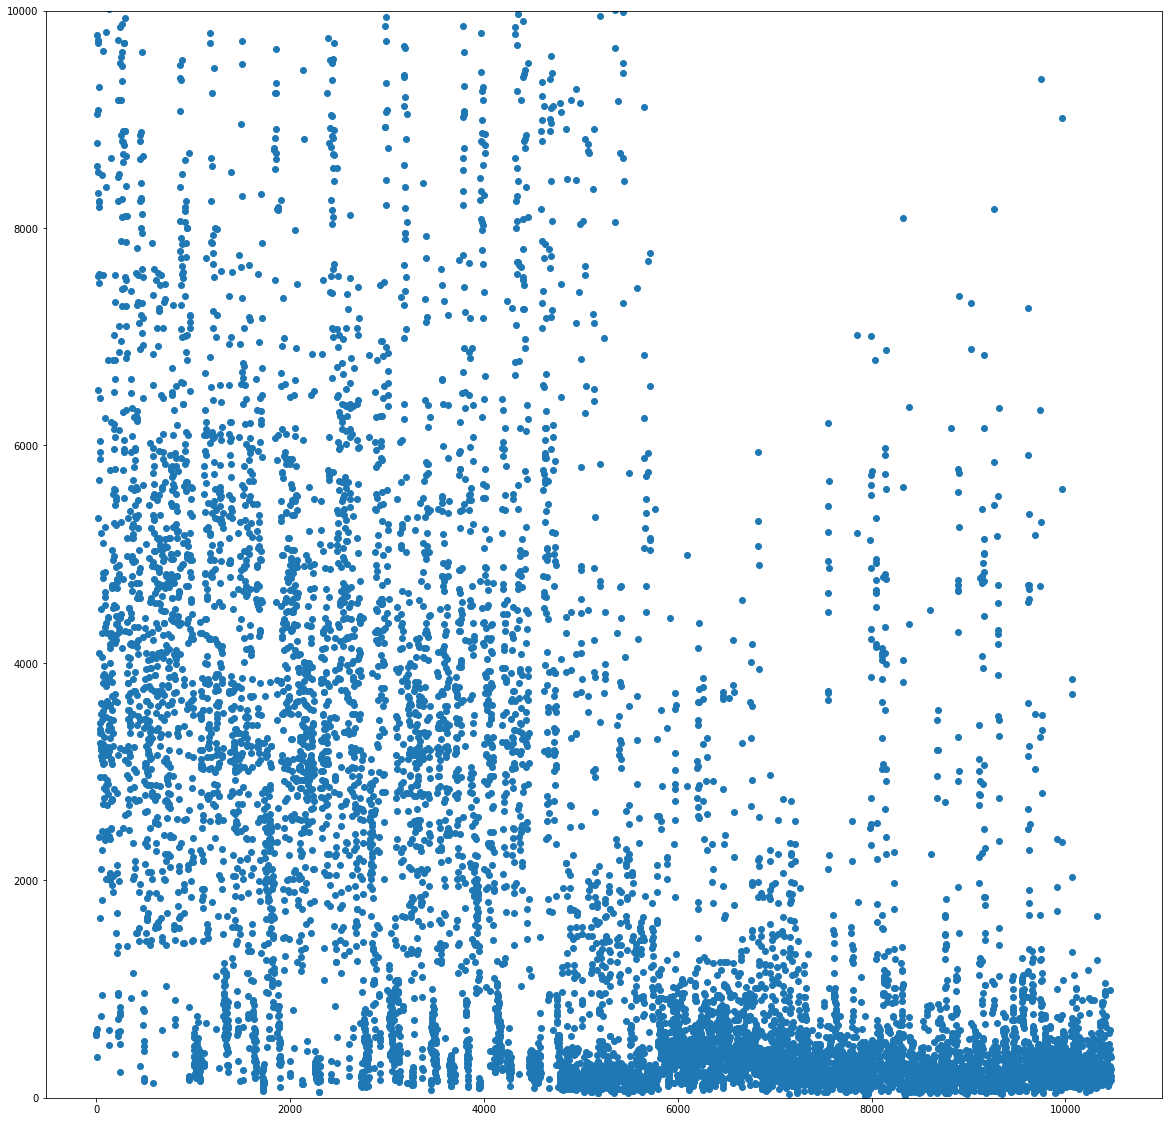

In [8]:
def bucket_boxes(j_path):
    j = json.load(open(j_path))
    areR = [[0, 16**2],[16**2, 32**2],[32**2, 96**2], [96**2, 10000**2]]
    annos = j['annotations']
    very_small = 0
    small = 0
    medium = 0
    large = 0
    all_areas = []
    for ann in annos:
        a = ann['area']
        if a<= areR[0][1]:
            very_small += 1
        elif a <= areR[1][1]:
            small+=1
        elif a<=areR[2][1]:
            medium += 1
        elif a<=areR[3][1]:
            large +=1 
        all_areas.append(a)
    print("Number of annotations:\ntotal: {}\nvery_small: {} \nsmall: {} \nmedium: {} \nlarge: {}".format(len(annos),very_small, small, medium, large))
    plt.scatter([i for i in range(len(all_areas))], all_areas)
    plt.ylim(0, 10000)
#    plt.xlim(0, 100)
    plt.show()
bucket_boxes(coco_json_path)

Number of annotations:
total: 106396
very_small: 47394 
small: 41354 
medium: 17243 
large: 405


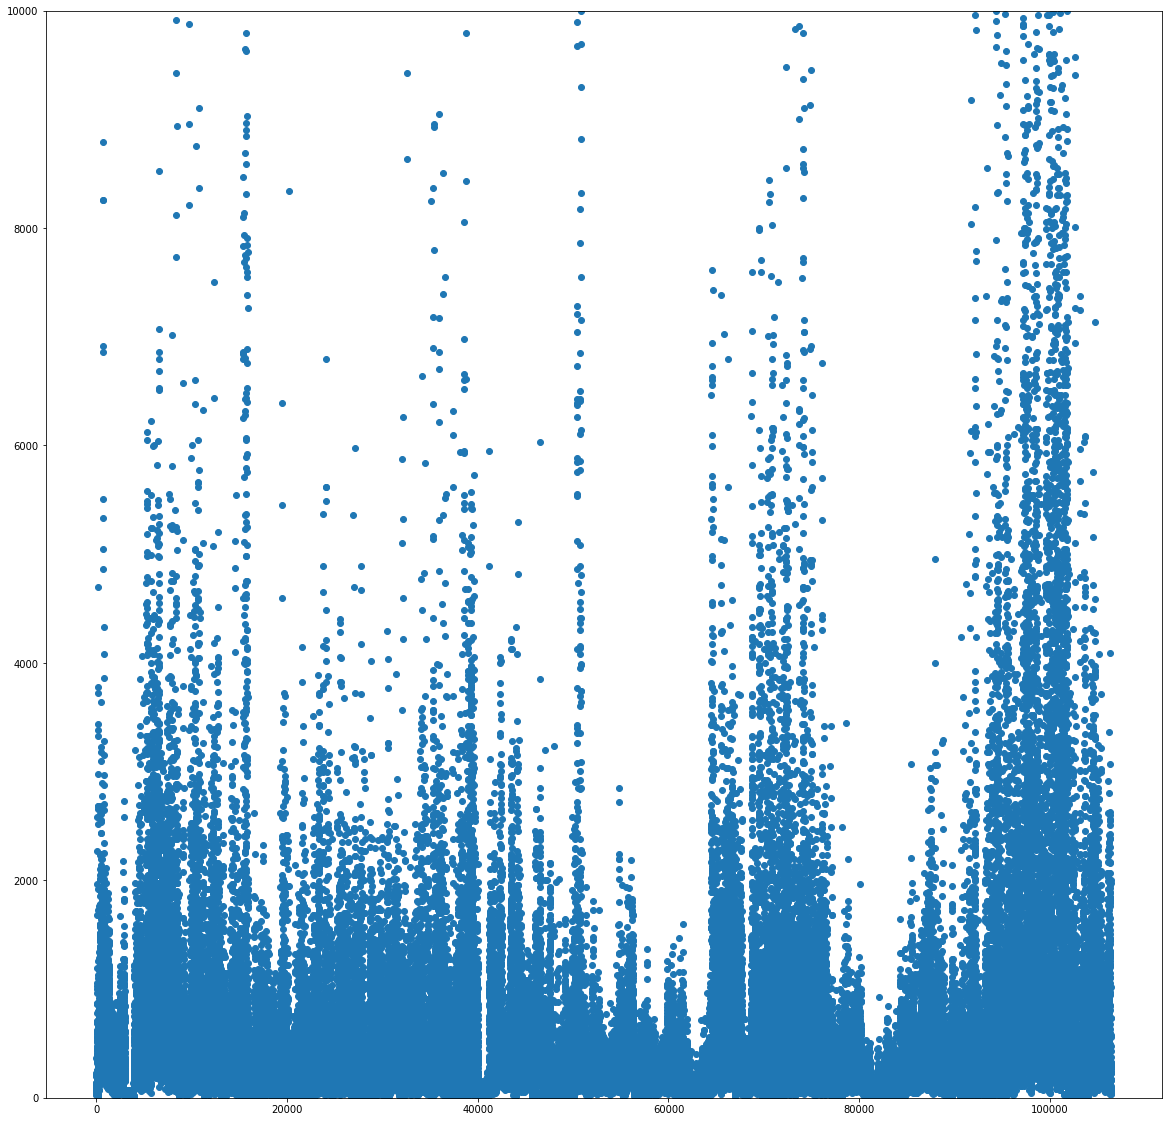

In [37]:
visdrone_t1_person = "/mnt/nfshome1/FRACTAL/sarang.pande/data/Visdrones/train_person.json"
bucket_boxes(visdrone_t1_person)

Number of annotations:
total: 343205
very_small: 89569 
small: 118050 
medium: 116610 
large: 18976


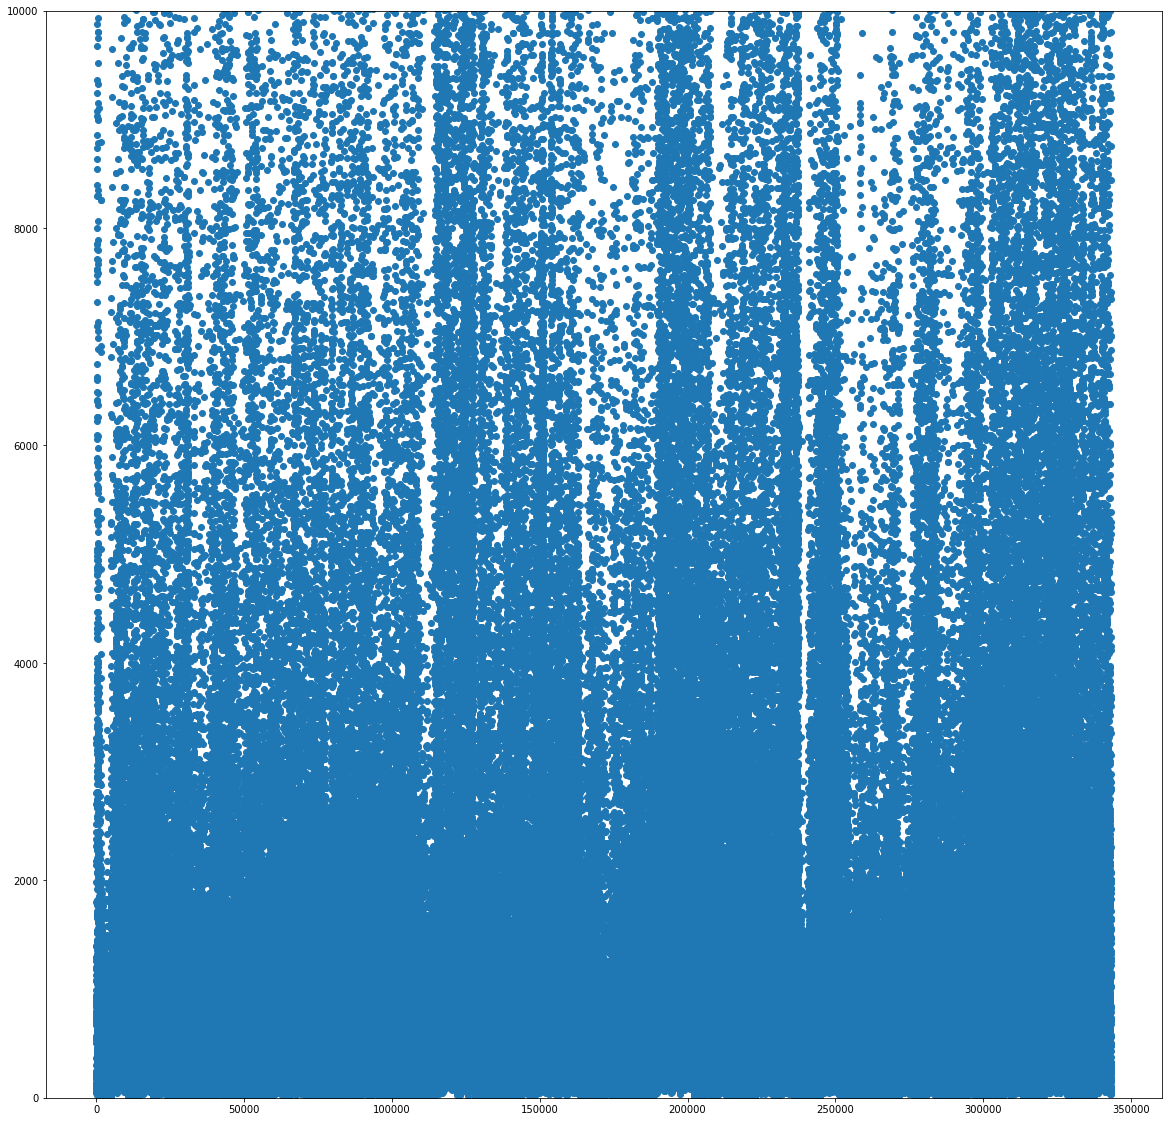

In [36]:
visdrone_t1_all = "/mnt/nfshome1/FRACTAL/sarang.pande/data/Visdrones/train_all.json"
bucket_boxes(visdrone_t1_all)

## Check annotation on few images

In [9]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io

In [10]:
annoFile = coco_json_path
coco = COCO(annoFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


In [11]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
human

COCO supercategories: 
human


In [12]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img

{'height': 720,
 'width': 1280,
 'id': 418,
 'file_name': '/nfs/gpu14_datasets/client_datasets/idea_forge/annotations/test_set_v0.2/images/gt_on_model_pred_imgs/03April202017_42_05_gt/128900.jpg'}

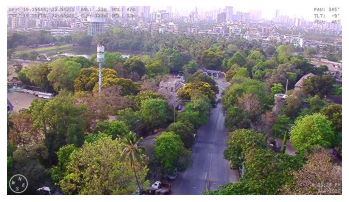

In [13]:
I = io.imread(img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

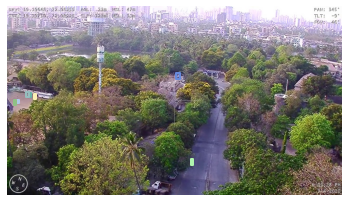

In [14]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [15]:
import json 
j = json.load(open(coco_json_path))
j['annotations'][0]

{'iscrowd': 0,
 'image_id': 1,
 'bbox': [247.0, 352.0, 18.0, 32.0],
 'segmentation': [[247.0, 352.0, 265.0, 352.0, 265.0, 384.0, 247.0, 384.0]],
 'category_id': 1,
 'id': 1,
 'area': 576.0}

In [16]:
j.keys()

dict_keys(['images', 'categories', 'annotations'])

In [17]:
j['categories']

[{'supercategory': 'human', 'id': 1, 'name': 'human'}]